<a href="https://colab.research.google.com/github/gracelin0711/20250218/blob/main/%E7%A8%8B%E5%BC%8F%E4%BD%9C%E6%A5%AD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 標題：鑽石價格數據分析報告

本報告針對 `Seaborn` 提供的 `diamonds` 資料集，探討鑽石價格與其物理與品質屬性（如克拉數、切工、顏色與淨度）之間的關聯。透過資料探索與視覺化分析，找出影響價格的主要因子，提供對鑽石市場定價機制的初步洞察。



## 引言

### 背景
新增區段鑽石是一種高價值的商品，其價格受到多種因素影響，例如克拉重量（carat）、切工品質（cut）、顏色（color）及淨度（clarity）。透過數據分析這些變數與價格的關係，能幫助我們更有效理解市場行為與價值評估。

### 目的
本研究的目標是找出影響鑽石價格的關鍵因素，透過分析不同屬性組合下的價格分布，利用可視化與統計解釋支持觀察結果，並提供可行的見解來幫助業者提升收益。
### 待答問題
1. 鑽石重量（carat）與價格之間有明顯的正相關嗎？
2. 不同切工（cut）、顏色（color）、淨度（clarity）對價格有什麼影響？
3. 哪一組品質屬性的鑽石價格最貴？


## 方法

### 數據來源
本研究使用 `seaborn` 內建的 `diamonds` 數據集，該數據集包含

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入 `diamonds` 數據集並檢視數據概況。
2. 探索性數據分析（EDA）以了解數據分佈與異常值。
3. 繪製散點圖、長條圖、盒狀圖等，分析關鍵變數之間的關係。

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('diamonds')
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 結果與分析

### carat 與 price 的關係

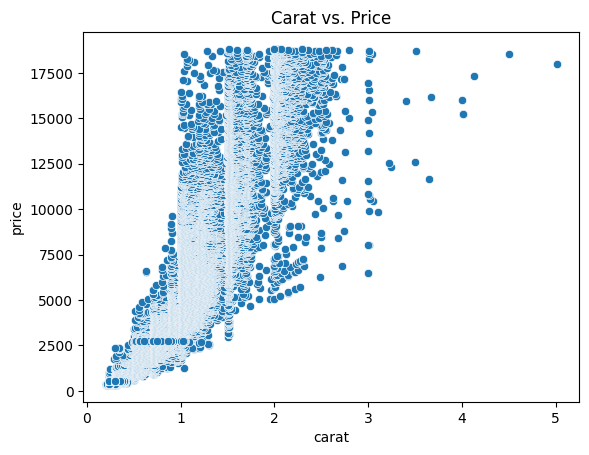

In [ ]:
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs. Price')
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

分析結果：從圖中可以看出，鑽石重量越高，價格通常也越高，但並非線性關係。

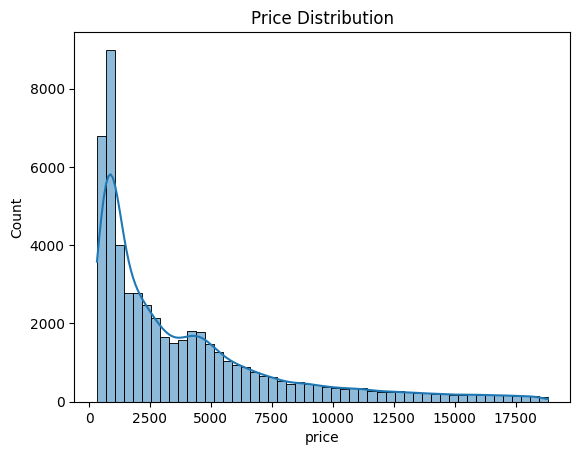

In [ ]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

分析結果：從圖中可以看出，鑽石價格越高，通常數量越少。

## 不同切工（cut）、顏色（color）、淨度（clarity）對價格影響

### 切工（cut）對價格影響

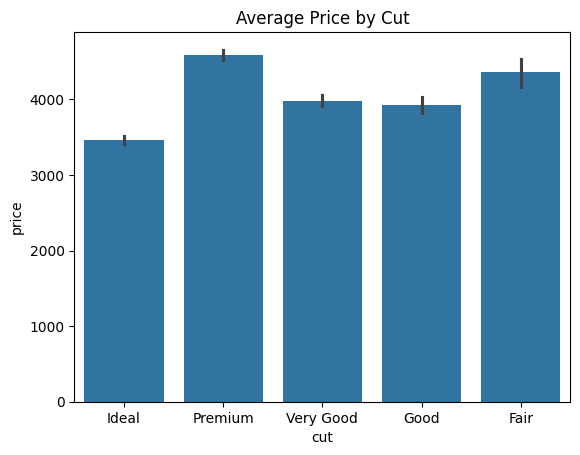

In [ ]:
sns.barplot(x='cut', y='price', data=df)
plt.title('Average Price by Cut')
plt.show()

分析結果：從圖中可以看出，價格並非完全隨著切工等級而上升，Ideal 等級反而是平均價格最低的一組（約 3400 美元），由高到低的平均價格排序大致為：
Premium > Fair > Very Good > Good > Ideal


### 顏色（color）對價格影響

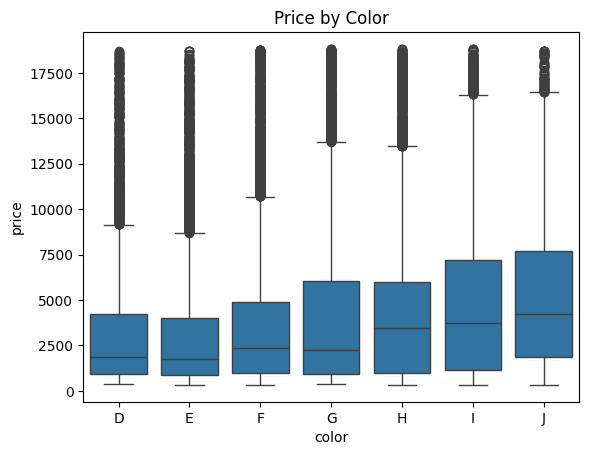

In [ ]:
sns.boxplot(x='color', y='price', data=df)
plt.title('Price by Color')
plt.show()


分析結果：從圖中可以看出，價格中位數大致上隨顏色等級下降而上升，推測原因為顏色不是定價唯一因素，很多J色等級鑽石可能重量更大、切工更好，因此平均價格拉高。


### 淨度對價格影響

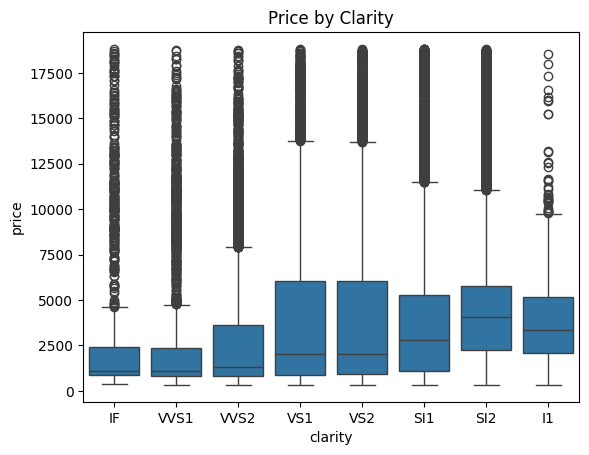

In [ ]:
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price by Clarity')
plt.show()

分析結果：從圖中可以看出，IF（無內含物）與 VVS1、VVS2 等高淨度鑽石的價格中位數明顯較低。推測原因為淨度不是定價唯一因素。





## 結論與建議

### 結論

1.   由散點圖顯示，隨著克拉數上升，鑽石價格大致會增加，顯示重量是影響價格的主要因素之一，但這種關係不是完全線性，特定克拉數段會出現價格快速上升的情況，可能與市場偏好或稀有度相關。
2.   雖然切工被認為與鑽石火光與美觀度有關，但分析顯示 Ideal 切工等級的平均價格反而偏低，而 Premium 與 Fair 的平均價格反而較高，顯示市場對切工的定價未必與理論品質等級一致。
3.   淨度（clarity）高不代表價格高
IF（無內含物）、VVS1、VVS2 等高淨度鑽石的中位數價格反而較低，這與直覺相反。推測可能是高淨度鑽石的樣本中多為低克拉或其他條件較差的鑽石，顯示價格是由多因子共同決定，而非單一屬性主導。







### 建議





1.   進一步納入分析interaction（例如：cut × clarity）進行迴歸模型預測，綜合考量克拉、切工、顏色與淨度的組合，才能較準確評估價格。
1.   使用回歸模型（如線性回歸或決策樹）量化每一個屬性對價格的貢獻程度，以提供更科學的定價建議。


3.   本報告未涵蓋品牌溢價與認證機構（如 GIA）對價格的影響。建議後續研究可納入這些非物理屬性因素，以建立更完整的鑽石價格模型。




